In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [8]:
df=pd.read_csv("Train .csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 577 non-null    int64  
 1   Pclass                   577 non-null    int64  
 2   Name                     577 non-null    object 
 3   Sex                      577 non-null    object 
 4   Age                      577 non-null    float64
 5   Siblings/Spouses Aboard  577 non-null    int64  
 6   Parents/Children Aboard  577 non-null    int64  
 7   Fare                     577 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 36.2+ KB


In [393]:
df.count()

Survived                   577
Pclass                     577
Name                       577
Sex                        577
Age                        577
Siblings/Spouses Aboard    577
Parents/Children Aboard    577
Fare                       577
dtype: int64

In [394]:
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [46]:
df = df.fillna(df.mean()) #though our data has no null values
df = pd.get_dummies(df, columns=["Sex"]) #converts categorical variables into dummy or indicator variables i.e 0 or 1
df = df.drop(["Name"], axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 577 non-null    int64  
 1   Pclass                   577 non-null    int64  
 2   Age                      577 non-null    float64
 3   Siblings/Spouses Aboard  577 non-null    int64  
 4   Parents/Children Aboard  577 non-null    int64  
 5   Fare                     577 non-null    float64
 6   Relatives Aboard         577 non-null    int64  
 7   Sex_female               577 non-null    uint8  
 8   Sex_male                 577 non-null    uint8  
dtypes: float64(2), int64(5), uint8(2)
memory usage: 32.8 KB


In [14]:
df['Relatives Aboard'] = df['Siblings/Spouses Aboard'] + df['Parents/Children Aboard']
df.head()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Relatives Aboard,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,1,1,0
2,1,3,26.0,0,0,7.9250,0,1,0
3,1,1,35.0,1,0,53.1000,1,1,0
4,0,3,35.0,0,0,8.0500,0,0,1


In [47]:
X=df[['Age','Pclass','Relatives Aboard','Fare','Sex_female']]
Y=df['Survived']
#Feature scaling
#normalising X values
#Zscore normalisation
X=X.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0) 

In [48]:
#Random values initialised for our parameters w1,w2,w3(weights),b,...

import random
def initialize(dim):
    b=random.random()
    w=np.random.rand(dim)#random.rand() creates an array of specified shape and fills it with random numbers lying btw 0 and 1
    return b,w
b,w=initialize(5)
print("Bias: ",b,"Weights: ",w)

Bias:  0.8152857463073375 Weights:  [0.26517523 0.90416381 0.84298184 0.13837341 0.97491286]


In [49]:
def predict_y(b,w,X):
    return b+np.dot(X,w)            #z=w1_x1+w2_x2+w3_x3+b

def sigmoid(z):
    return 1/(1+np.exp(-z))

f=sigmoid(predict_y(b,w,X))
f[0:25]

array([0.65388296, 0.72489484, 0.90018686, 0.70248097, 0.58825832,
       0.55197966, 0.209962  , 0.86724876, 0.9636025 , 0.81489838,
       0.94600633, 0.66497656, 0.5191967 , 0.97457477, 0.8781618 ,
       0.84308832, 0.91871447, 0.28179715, 0.94515103, 0.89307868,
       0.33778416, 0.32513521, 0.88019913, 0.13484817, 0.98200842])

In [50]:
f=sigmoid(predict_y(b,w,X))
#Regularized cost function
def cost_J(y,f):
    m=len(y)
    l=0.01
    cost = (-(1 / m) * np.sum(y * np.log(f) + (1 - y) * np.log(1 - f)))+(l/(2*m)*(np.sum(w*w)))
    return cost

cost_J(Y,f)

0.9067693908594159

In [51]:
def update(X,Y,f,b,w,a): #a is learning rate
   
    dj_db=(np.sum(f-Y))/len(Y)
    dj_dw=(np.dot((f-Y),X))/len(Y)
     #simultaneous update
    new_b=b-a*dj_db
    new_w=w-a*dj_dw
    return new_b,new_w
print("initial values  bias: ",b,"weight: ",w)

initial values  bias:  0.8152857463073375 weight:  [0.26517523 0.90416381 0.84298184 0.13837341 0.97491286]


In [52]:
b,w=update(X,Y,f,b,w,0.01)
f=sigmoid(predict_y(b,w,X))
print("After first update -Bias: ",b,"weights: ",w)
cost_J(Y,f)

After first update -Bias:  0.8129569607923783 weights:  [0.26554095 0.90169505 0.84180971 0.13935181 0.97592822]


0.9052695280226378

In [53]:
f=sigmoid(predict_y(b,w,X)) 
j=[]
List=[]
for i in range(8000):
    b,w=update(X,Y,f,b,w,0.01)
    f=sigmoid(predict_y(b,w,X)) 
    #print(cost_J(Y,f)
    j.append(cost_J(Y,f))
    List.append(i)
cost_J(Y,f)

0.46054679217980504

Text(0, 0.5, 'Cost Function J')

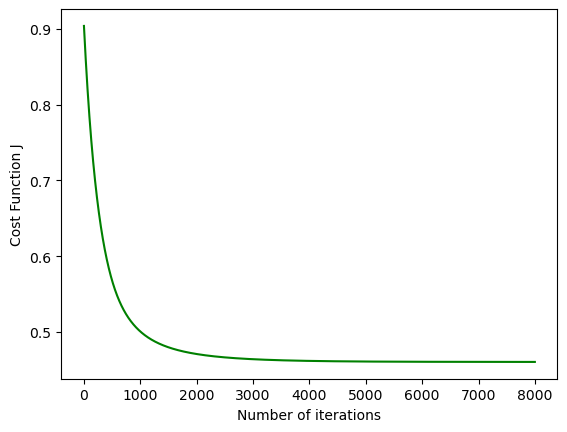

In [54]:
%matplotlib inline
plt.plot(List,j,color='green')
plt.xlabel("Number of iterations")
plt.ylabel("Cost Function J")

# Testing the model


In [55]:
df2=pd.read_csv("Test .csv")
df2= pd.get_dummies(df2, columns=["Sex"])#converts categorical variables into dummy or indicator variables i.e 0 or 1
df2 = df2.drop(["Name"], axis=1)
df2['Relatives Aboard'] = df2['Siblings/Spouses Aboard'] + df2['Parents/Children Aboard']
df2.head()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_female,Sex_male,Relatives Aboard
0,1,2,25.0,1,1,30.0000,1,0,2
1,1,1,39.0,1,1,110.8833,1,0,2
2,0,2,54.0,0,0,26.0000,0,1,0
3,0,1,36.0,0,0,40.1250,0,1,0
4,0,3,16.0,0,0,8.7125,0,1,0


In [56]:
x=df2[['Age','Pclass','Relatives Aboard','Fare','Sex_female']]
y=df2['Survived']

#Feature scaling
#normalising X values
#Zscore normalisation
x=x.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0) 

In [57]:
f=sigmoid(predict_y(b,w,x)) 

pred=[]
for i in range(len(y)):
    if f[i]>=0.5:
        pred.append(1)
    else:
        pred.append(0)
        
def accuracy(y, pred):
    accuracy = np.sum(y == pred)/len(y)
    return accuracy
print("Accuracy is ",accuracy(y,pred)*100,"%")

Accuracy is  80.96774193548387 %
